In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

Solvers

In [2]:
#SH Solver using RK4 for Nonlin part

def non_lin_rhs(w,R):
    return (R-1)*w - w**3

def integrateSH(w0,R,dt,nSteps,L):
     """
     :param w0: initial temperature surface
     :param R: bifurcation parameter- can be a constant, or of same shape as w0
     :param dt: time step length
     :param nSteps: number of time steps to take
     :param L: Length of square over which w0 is defined
     :return w0: time evolution of w0 at time 0+dt*nSteps
     Ideally, the size of w0 is fft friendly, ie 2^n x 2^n
     """
     print("Starting time integration of Swift Hohenberg")
     ny, nx = np.shape(w0)
     print("Dimensions of w0:", nx, ny)
     kx = (2.*np.pi/L)*sp.fft.fftfreq(nx,1./nx)
     ky = (2.*np.pi/L)*sp.fft.fftfreq(ny,1./ny)
     Kx, Ky = np.meshgrid(kx,ky)
     fourierLaplacian = -(Kx**2+Ky**2)
     A = -(fourierLaplacian*fourierLaplacian)-2*fourierLaplacian
     for i in range(0,nSteps):
         if i%100 == 0:
             print("step number:",i)
         w1 = np.real(sp.fft.ifft2(np.exp(A*.5*dt)*sp.fft.fft2(w0)))

         #rk4 version
         #k1 = dt*w1
         #k2 = dt*non_lin_rhs(w1+.5*k1, R)
         #k3 = dt*non_lin_rhs(w1+.5*k2, R)
         #k4 = dt*non_lin_rhs(w1+k3, R)
         #w2 = (k1+2*k2+2*k3+k4)/6 + w1

         #fwd euler version
         w2 = dt*((R-1)*w1-w1**3)+w1

         w0 = np.real(sp.fft.ifft2(np.exp(A*.5*dt)*sp.fft.fft2(w2)))
     return w0


Code for the Solver

Starting time integration of Swift Hohenberg
Dimensions of w0: 256 256
step number: 0


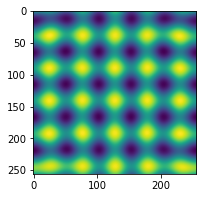

In [12]:
x = np.linspace(-16,16,256)
y = np.linspace(-16,16,256)
X,Y = np.meshgrid(x,y)
w0 = (1./20.)*(np.cos(X)+np.sin(2*X)+np.sin(Y)+np.cos(2*Y))
w0 = w0 + (np.exp(-((X-5*np.pi)**2 +(Y-5*np.pi)**2)))
w0 = w0 + (np.exp(-((X-5*np.pi)**2 +(Y-15*np.pi)**2)))
w0 = w0 + (np.exp(-((X-15*np.pi)**2 +(Y-15*np.pi)**2)))
w0 = w0 + (np.exp(-((X-15*np.pi)**2 +(Y-5*np.pi)**2)))
w0 = w0 + (np.exp(-((X-10*np.pi)**2 +(Y-10*np.pi)**2)))
dt = .1
R=.5
L=x[len(x)-1]-x[0]
nSteps = 100
W1 = integrateSH(w0,R,dt,nSteps,L)
fig1, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(3,3))
ax1.imshow(W1)
plt.savefig("/Users/edwardmcdugald/Research/convection_patterns/code/figs/sh_num_tsts_1018/mySH1.pdf")

Test One

Starting time integration of Swift Hohenberg
Dimensions of w0: 96 96
step number: 0
step number: 100
step number: 200
step number: 300
step number: 400
step number: 500
step number: 600
step number: 700
step number: 800
step number: 900


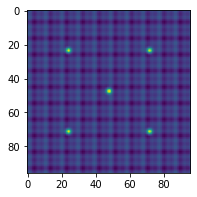

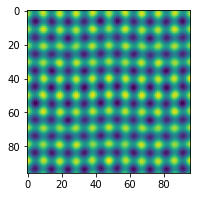

In [16]:
x = np.linspace(0,20*np.pi,96)
y = np.linspace(0,20*np.pi,96)
X,Y = np.meshgrid(x,y)
w0 = (1./20.)*(np.cos(X)+np.sin(2*X)+np.sin(Y)+np.cos(2*Y))
w0 = w0 + (np.exp(-((X-5*np.pi)**2 +(Y-5*np.pi)**2)))
w0 = w0 + (np.exp(-((X-5*np.pi)**2 +(Y-15*np.pi)**2)))
w0 = w0 + (np.exp(-((X-15*np.pi)**2 +(Y-15*np.pi)**2)))
w0 = w0 + (np.exp(-((X-15*np.pi)**2 +(Y-5*np.pi)**2)))
w0 = w0 + (np.exp(-((X-10*np.pi)**2 +(Y-10*np.pi)**2)))
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(3,3))
ax.imshow(w0)
dt = 2e-1
R= 1e-2
L=x[len(x)-1]-x[0]
nSteps = 1000
W2 = integrateSH(w0,R,dt,nSteps,L)
fig2, ax2 = plt.subplots(nrows=1, ncols=1, figsize=(3,3))
ax2.imshow(W2)
plt.savefig("/Users/edwardmcdugald/Research/convection_patterns/code/figs/sh_num_tsts_1018/mySH2.pdf")

Test Two

Starting time integration of Swift Hohenberg
Dimensions of w0: 96 96
step number: 0
step number: 100
step number: 200
step number: 300
step number: 400
step number: 500
step number: 600
step number: 700
step number: 800
step number: 900


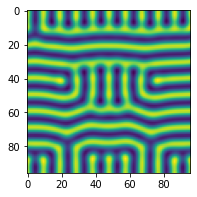

In [20]:
x = np.linspace(0,20*np.pi,96)
y = np.linspace(0,20*np.pi,96)
X,Y = np.meshgrid(x,y)
w0 = (1./20.)*(np.cos(X)+np.sin(2*X)+np.sin(Y)+np.cos(2*Y))
w0 = w0 + (np.exp(-((X-5*np.pi)**2 +(Y-5*np.pi)**2)))
w0 = w0 + (np.exp(-((X-5*np.pi)**2 +(Y-15*np.pi)**2)))
w0 = w0 + (np.exp(-((X-15*np.pi)**2 +(Y-15*np.pi)**2)))
w0 = w0 + (np.exp(-((X-15*np.pi)**2 +(Y-5*np.pi)**2)))
w0 = w0 + (np.exp(-((X-10*np.pi)**2 +(Y-10*np.pi)**2)))
dt = 2e-1
R= 7e-1
L=x[len(x)-1]-x[0]
nSteps = 1000
W3 = integrateSH(w0,R,dt,nSteps,L)
fig3, ax3 = plt.subplots(nrows=1, ncols=1, figsize=(3,3))
ax3.imshow(W3)
plt.savefig("/Users/edwardmcdugald/Research/convection_patterns/code/figs/sh_num_tsts_1018/mySH3.pdf")

Test Three

Starting time integration of Swift Hohenberg
Dimensions of w0: 100 100
step number: 0
step number: 100
step number: 200
step number: 300
step number: 400
step number: 500
step number: 600
step number: 700
step number: 800
step number: 900
Starting time integration of Swift Hohenberg
Dimensions of w0: 100 100
step number: 0
step number: 100
step number: 200
step number: 300
step number: 400
step number: 500
step number: 600
step number: 700
step number: 800
step number: 900
step number: 1000
step number: 1100
step number: 1200
step number: 1300
step number: 1400
step number: 1500
step number: 1600
step number: 1700
step number: 1800
step number: 1900
step number: 2000
step number: 2100
step number: 2200
step number: 2300
step number: 2400
step number: 2500
step number: 2600
step number: 2700
step number: 2800
step number: 2900
step number: 3000
step number: 3100
step number: 3200
step number: 3300
step number: 3400
step number: 3500
step number: 3600
step number: 3700
step number: 3800


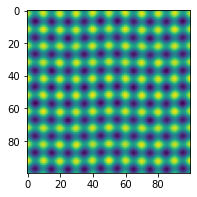

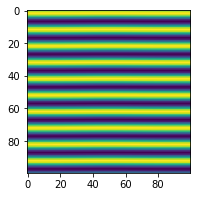

In [10]:
x = np.linspace(0,20*np.pi,100)
y = np.linspace(0,20*np.pi,100)
X,Y = np.meshgrid(x,y)
w0 = (1./20.)*(np.cos(X)+np.sin(2*X)+np.sin(Y)+np.cos(2*Y))
w0 = w0 + (np.exp(-((X-5*np.pi)**2 +(Y-5*np.pi)**2)))
w0 = w0 + (np.exp(-((X-5*np.pi)**2 +(Y-15*np.pi)**2)))
w0 = w0 + (np.exp(-((X-15*np.pi)**2 +(Y-15*np.pi)**2)))
w0 = w0 + (np.exp(-((X-15*np.pi)**2 +(Y-5*np.pi)**2)))
w0 = w0 + (np.exp(-((X-10*np.pi)**2 +(Y-10*np.pi)**2)))
dt = 2e-1
R= 1e-1
L=x[len(x)-1]-x[0]
nSteps = 1000
W4 = integrateSH(w0,R,dt,nSteps,L)
fig4, ax4 = plt.subplots(nrows=1, ncols=1, figsize=(3,3))
ax4.imshow(W4)
plt.savefig("/Users/edwardmcdugald/Research/convection_patterns/code/figs/sh_num_tsts_1018/mySH4_1.pdf")

nSteps = 10000
W4b = integrateSH(w0,R,dt,nSteps,L)
fig4b, ax4b = plt.subplots(nrows=1, ncols=1, figsize=(3,3))
ax4b.imshow(W4b)
plt.savefig("/Users/edwardmcdugald/Research/convection_patterns/code/figs/sh_num_tsts_1018/mySH4_2.pdf")

Test 4

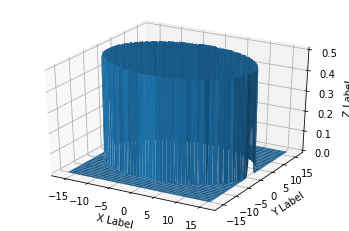

In [13]:
def fun(x, y, R):
    argmt = x**2+2*y**2-256.
    return R*(-1./(1.+np.exp(-argmt))+1.)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = y = np.linspace(-16.0, 16.0, 256)
X, Y = np.meshgrid(x, y)
R=.5
zs = np.array(fun(np.ravel(X), np.ravel(Y), R))
Z = zs.reshape(X.shape)

ax.plot_surface(X, Y, Z)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

Sigmoid Ellipse Surface

Starting time integration of Swift Hohenberg
Dimensions of w0: 256 256
step number: 0


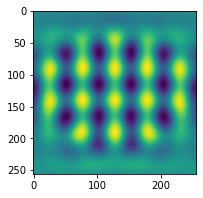

In [14]:
x = np.linspace(-16,16,256)
y = np.linspace(-16,16,256)
X,Y = np.meshgrid(x,y)
w0 = (1./20.)*(np.cos(X)+np.sin(2*X)+np.sin(Y)+np.cos(2*Y))
w0 = w0 + (np.exp(-((X-5*np.pi)**2 +(Y-5*np.pi)**2)))
w0 = w0 + (np.exp(-((X-5*np.pi)**2 +(Y-15*np.pi)**2)))
w0 = w0 + (np.exp(-((X-15*np.pi)**2 +(Y-15*np.pi)**2)))
w0 = w0 + (np.exp(-((X-15*np.pi)**2 +(Y-5*np.pi)**2)))
w0 = w0 + (np.exp(-((X-10*np.pi)**2 +(Y-10*np.pi)**2)))
dt = .1
R=.5*(-1./(1.+np.exp(-(X**2+2*Y**2-256.)))+1.)
L=x[len(x)-1]-x[0]
nSteps = 100
W1_2 = integrateSH(w0,R,dt,nSteps,L)
fig1_2, ax1_2 = plt.subplots(nrows=1, ncols=1, figsize=(3,3))
ax1_2.imshow(W1_2)
plt.savefig("/Users/edwardmcdugald/Research/convection_patterns/code/figs/sh_num_tsts_1018/mySH1_2.pdf")

Repeat One using Sigmoid (Ellipse)

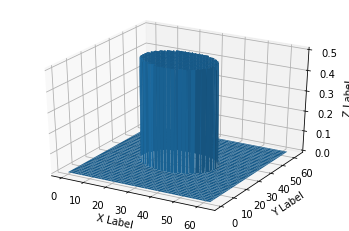

In [17]:
def fun(x, y, R):
    argmt = (x-10*np.pi)**2+2*(y-10*np.pi)**2-256.
    return R*(-1./(1.+np.exp(-argmt))+1.)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = y = np.linspace(0, 20*np.pi, 256)
X, Y = np.meshgrid(x, y)
R=.5
zs = np.array(fun(np.ravel(X), np.ravel(Y), R))
Z = zs.reshape(X.shape)

ax.plot_surface(X, Y, Z)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

Sigmoid Ellipse not at origin

Starting time integration of Swift Hohenberg
Dimensions of w0: 256 256
step number: 0
step number: 100
step number: 200
step number: 300
step number: 400
step number: 500
step number: 600
step number: 700
step number: 800
step number: 900


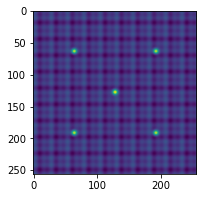

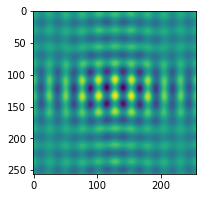

In [19]:
x = np.linspace(0,20*np.pi,256)
y = np.linspace(0,20*np.pi,256)
X,Y = np.meshgrid(x,y)
w0 = (1./20.)*(np.cos(X)+np.sin(2*X)+np.sin(Y)+np.cos(2*Y))
w0 = w0 + (np.exp(-((X-5*np.pi)**2 +(Y-5*np.pi)**2)))
w0 = w0 + (np.exp(-((X-5*np.pi)**2 +(Y-15*np.pi)**2)))
w0 = w0 + (np.exp(-((X-15*np.pi)**2 +(Y-15*np.pi)**2)))
w0 = w0 + (np.exp(-((X-15*np.pi)**2 +(Y-5*np.pi)**2)))
w0 = w0 + (np.exp(-((X-10*np.pi)**2 +(Y-10*np.pi)**2)))
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(3,3))
ax.imshow(w0)
dt = 2e-1
R= 1e-2*(-1./(1.+np.exp(-((X-10*np.pi)**2+2*(Y-10*np.pi)**2-256.)))+1.)
L=x[len(x)-1]-x[0]
nSteps = 1000
W2_2 = integrateSH(w0,R,dt,nSteps,L)
fig2_2, ax2_2 = plt.subplots(nrows=1, ncols=1, figsize=(3,3))
ax2_2.imshow(W2_2)
plt.savefig("/Users/edwardmcdugald/Research/convection_patterns/code/figs/sh_num_tsts_1018/mySH2_2.pdf")

Repeat Two using Sigmoid (Ellipse)

Starting time integration of Swift Hohenberg
Dimensions of w0: 256 256
step number: 0
step number: 100
step number: 200
step number: 300
step number: 400
step number: 500
step number: 600
step number: 700
step number: 800
step number: 900


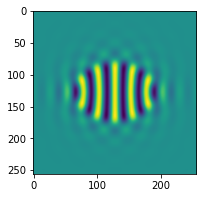

In [21]:
x = np.linspace(0,20*np.pi,256)
y = np.linspace(0,20*np.pi,256)
X,Y = np.meshgrid(x,y)
w0 = (1./20.)*(np.cos(X)+np.sin(2*X)+np.sin(Y)+np.cos(2*Y))
w0 = w0 + (np.exp(-((X-5*np.pi)**2 +(Y-5*np.pi)**2)))
w0 = w0 + (np.exp(-((X-5*np.pi)**2 +(Y-15*np.pi)**2)))
w0 = w0 + (np.exp(-((X-15*np.pi)**2 +(Y-15*np.pi)**2)))
w0 = w0 + (np.exp(-((X-15*np.pi)**2 +(Y-5*np.pi)**2)))
w0 = w0 + (np.exp(-((X-10*np.pi)**2 +(Y-10*np.pi)**2)))
dt = 2e-1
R= 7e-1*(-1./(1.+np.exp(-((X-10*np.pi)**2+2*(Y-10*np.pi)**2-256.)))+1.)
L=x[len(x)-1]-x[0]
nSteps = 1000
W3_2 = integrateSH(w0,R,dt,nSteps,L)
fig3_2, ax3_2 = plt.subplots(nrows=1, ncols=1, figsize=(3,3))
ax3_2.imshow(W3_2)
plt.savefig("/Users/edwardmcdugald/Research/convection_patterns/code/figs/sh_num_tsts_1018/mySH3_2.pdf")

Repeat Three using Sigmoid (Ellipse)